In [1]:
# import numpy as np
# import networkx as nx
# import pandas as pd
# import sys
# from collections import Counter
# import time
# from numba import jit
# from numba.typed import Dict
# from numba.typed import List



# # @jit(nopython=True)
# # def initializeDigraph(data):
# # #     G = {}
# #     G = Dict.empty(
# #         key_type=types.unicode_type,
# #         value_type=types.int32[:],
# #     )
# #     allUniqueNodes = np.unique(data)
# #     for row in range(len(data)):
# #         node = data[row,0]
# #         edge = data[row,1]
# #         if node in G.keys():
            
# #             G.setdefault(node,List()).append(edge)

# #         else:
# #             G.update({node:[edge]})
            
# #     for node in allUniqueNodes:
# #         if node not in G.keys():
# #             G.update({node:[node]})
        
# #     return G

# def initializeDigraph(data=None):

#     G = {}
 
#     allUniqueNodes = np.unique(data)
#     for row in range(len(data)):
#         node = data[row,0]
#         edge = data[row,1]
#         if node in G.keys():
            
#             G.setdefault(node,[]).append(edge)

#         else:
#             G.update({node:[edge]})
            
#     for node in allUniqueNodes:
#         if node not in G.keys():
#             G.update({node:[node]})
        
#     return G

# # depth first search
# def dfs(G,node,path=[]):
#     path.append(node)
#     for edge in G[node]:
#         if edge not in path:
#             dfs(G,edge,path)
#     return path

# # dfs using a stack
# def dfs_stack(G,start):
#     stack,path = [start],[]
#     while stack:
#         node = stack.pop()
#         if node not in path:
#             path.append(node)
#         for edge in G[node]:
#             if edge not in path:
#                 stack.append(edge)
#     return path

# def reverseGraph(G):
#     data = []
#     for node,edges in G.items():
#         for edge in edges:
#             data.append((edge,node))
#     data = np.asarray(data,dtype=int)

#     Grev = initializeDigraph(data)
#     return Grev


# ###############



# def kosarajui_SSC(G):
#     # subroutine
#     def dfs_loop(G,ordering=None):
#         global s

#         # Initialize path
#         path = []

#         # For pass 1 use nodes of graph in reverse order, for pass 2 use ordering
#         if ordering is None:
#             nodes = sorted(G.keys(),reverse=True)
#         else:
#             nodes = ordering

#         # Loop through nodes
#         for node in nodes:
#             if node not in path:
#                 s = node
#                 path = dfs_scc(G,node,path=path)

    
#     # depth first search for ssc
#     def dfs_scc(G,node,path=[]):
#         global order,leader
#         # Append node to path
#         path.append(node)
#         leader[node] = s
#         # Call dfs again on unexplored nodes
#         for edge in G[node]:
#             if edge not in path:
#                 dfs_scc(G,edge,path=path)
#         order = [node] + order
#         return path
    

#     global leader,order,count,s
#     s = None
#     order = []
#     leader = {}
#     # run dfs on reversed edges of graph
#     dfs_loop(reverseGraph(G))
#     print(order)
#     # run dfs on original graph, go through nodes in decreasing order of finishing
#     leader = {}
#     dfs_loop(G,ordering=order)
#     leaders = [leader[node] for node in G.keys()]
    
    
#     return leaders

# def kosarajui_SSC_stack(G):
#     # subroutine
#     def dfs_loop_stack(G,ordering=None):
#         global s

#         # Initialize path
#         path = []

#         # For pass 1 use nodes of graph in reverse order, for pass 2 use ordering
#         if ordering is None:
#             nodes = sorted(G.keys(),reverse=True)
#         else:
#             nodes = ordering

#         # Loop through nodes
#         for node in nodes:
#             if node not in path:
#                 s = node
#                 leader[node] = s
#                 path = dfs_scc_stack(G,node,path=path)


#     # depth first search for ssc
#     def dfs_scc_stack(G,start,path=[]):
#         global order,leader,s
#         stack = [start]
#         while stack:
#             node = stack.pop()
#             if node not in path:
#                 path.append(node)
#                 leader[node] = s
#                 stack.append(node)
#                 for edge in G[node][::-1]:
#                     if edge not in path:
#                         stack.append(edge)
#             else:
#                 if node not in order:
#                     order = [node] + order
#         return path   

#     global leader,order,count,s
#     s = None
#     order = []
#     leader = {}
#     # run dfs on reversed edges of graph
#     dfs_loop_stack(reverseGraph(G))
#     leader = {}
#     dfs_loop_stack(G,ordering=order)
#     leaders = [leader[node] for node in G.keys()]
    
    
#     return leaders



    
    

In [11]:



# # depth first search for ssc
# @jit(nopython=True)
# def dfs_scc_stack_optimized(G,start,order,leader,s,pathCounter,path,orderCounter):
#     stack = [start]
#     while stack:
#         node = stack.pop()
#         if node not in path:
#             path[pathCounter] = node
#             pathCounter +=1
#             leader[node-1] = s
#             stack.append(node)
#             for edge in G[node][::-1]:
#                 if edge not in path:
#                     stack.append(edge)
#         else:
#             if node not in order:
#                 order[orderCounter] = node
#                 orderCounter -=1
#     return order,leader,s,pathCounter,path,orderCounter





# # subroutine
# @jit(nopython=True)
# def dfs_loop_stack_optimized(G,ordering=None):
#     s = 0
#     orderCounter = -1
#     pathCounter = 0

#     # Initialize path
#     path = np.zeros((len(G),),dtype=int)
#     leader = np.zeros((len(G),),dtype=int)
#     order = np.zeros((len(G),),dtype=int)

#     # For pass 1 use nodes of graph in reverse order, for pass 2 use ordering
#     if ordering is None:
#         nodes = sorted(G.keys(),reverse=True)
#     else:
#         nodes = ordering

#     # Loop through nodes
#     for node in nodes:
#         if node not in path:
#             s = node
#             leader[node-1] = s
#             order,leader,s,pathCounter,path,orderCounter = dfs_scc_stack_optimized(G,node,order,leader,s,pathCounter,path,orderCounter)
#     return order,leader,s,pathCounter,path,orderCounter


# @jit(nopython=True)
# def kosarajui_SSC_stack_initializePath(G,Grev):



#     order,leader,s,pathCounter,path,orderCounter = dfs_loop_stack_optimized(Grev)
# #     print('Loop1 Done')
#     order,leader,s,pathCounter,path,orderCounter = dfs_loop_stack_optimized(G,ordering=order)
#     leaders = [leader[node-1] for node in G.keys()]
    
    
#     return leaders

In [12]:
import numpy as np
import networkx as nx
import pandas as pd
import sys
from collections import Counter
import time

# depth first search for ssc
def initializeDigraph(data):

#     data = np.loadtxt(filename,dtype=int)
    G = {}

    allUniqueNodes = np.unique(data)
    for row in range(len(data)):
        node = data[row,0]
        edge = data[row,1]
        if node in G.keys():
            nodeData = G[node]
            edgeList = nodeData[1]
            edgeList.append(edge)
            G.update({node:(False,edgeList)})
        else:
            G.update({node:(False,[edge])})
            
    for node in allUniqueNodes:
        if node not in G.keys():
            G.update({node:(False,[node])})
        
    return G


def reverseGraph(G):
    data = []
    for node,nodeData in G.items():
        for edge in nodeData[1]:
            data.append((edge,node))
    data = np.asarray(data,dtype=int)
    Grev = initializeDigraph(data)
    return Grev


def dfs_scc_stack_optimized(G,start,s,orderCounter,order,leader):
    stack = np.zeros((len(G)*10,),dtype=int)
    stack[0] = start
    stackCounter = 0
    while stackCounter >=0:
        node = stack[stackCounter]
        stackCounter -= 1
        if not G[node][0]:
            G.update({node:(True,G[node][1])})
            leader[node-1] = s
            stackCounter += 1
            stack[stackCounter] = node
            for edge in G[node][1][::-1]:
                if not G[edge][0]:
                    stackCounter += 1
                    stack[stackCounter] = edge
        else:
            if node not in order:
                order[orderCounter] = node
                orderCounter +=1
    return G,s,orderCounter,order,leader


# subroutine

def dfs_loop_stack_optimized(G,ordering=None):
    orderCounter = 0
    order = np.zeros((len(G,)),dtype=int)
    leader = np.zeros((len(G,)),dtype=int)
                     

    # For pass 1 use nodes of graph in reverse order, for pass 2 use ordering
    if ordering is None:
        nodes = sorted(G.keys(),reverse=True)
    else:
        nodes = ordering

    # Loop through nodes
    for node in nodes:
        if not G[node][0]:
            s = node
            leader[node-1] = s
            G,s,orderCounter,order,leader = dfs_scc_stack_optimized(G,node,s,orderCounter,order,leader)
    order = np.flip(order)
    return order,leader


def kosarajui_SSC_stack_initializePath(G):

    

    order,_ = dfs_loop_stack_optimized(reverseGraph(G.copy()))
    print(order)
    _,leader = dfs_loop_stack_optimized(G,ordering=order)
    
    
    return leader

In [13]:
# len(G.edges())
len(G.nodes())

875714

# Using nx

In [14]:
# nx's answer
G = nx.read_edgelist('SCC.txt',create_using=nx.DiGraph)
for c in sorted(nx.strongly_connected_components(G), key=len, reverse=True)[0:5]:
    print(len(c))

434821
968
459
313
211


# Test Cases

In [15]:
Gtest = {'s':['a','b'],'a':['b','c'],'b':['s','a'],'c':['a','d'],'d':['b','c','e'],'e':['c','d']}
Gtest

{'s': ['a', 'b'],
 'a': ['b', 'c'],
 'b': ['s', 'a'],
 'c': ['a', 'd'],
 'd': ['b', 'c', 'e'],
 'e': ['c', 'd']}

In [16]:
path = dfs(Gtest,'s',path=[])
path

NameError: name 'dfs' is not defined

In [17]:
path = dfs_stack(Gtest,'s')
path

NameError: name 'dfs_stack' is not defined

In [18]:
Gtest = {1:[5],2:[3],3:[4],4:[5,2],5:[6],6:[9,1],7:[8],8:[9],9:[7]}
Gtest

{1: [5], 2: [3], 3: [4], 4: [5, 2], 5: [6], 6: [9, 1], 7: [8], 8: [9], 9: [7]}

In [19]:
data = np.loadtxt('scctest5.txt',dtype=int)
G = initializeDigraph(data)
G

{1: (False, [2]),
 2: (False, [3, 4, 5]),
 3: (False, [6]),
 4: (False, [5, 7]),
 5: (False, [2, 6, 7]),
 6: (False, [3, 8]),
 7: (False, [8, 10]),
 8: (False, [7]),
 9: (False, [7]),
 10: (False, [9, 11]),
 11: (False, [12]),
 12: (False, [10])}

In [20]:
g = nx.DiGraph()
g.add_nodes_from(G.keys())
for k, v in G.items():
    g.add_edges_from(([(k, t) for t in v]))

TypeError: unhashable type: 'list'

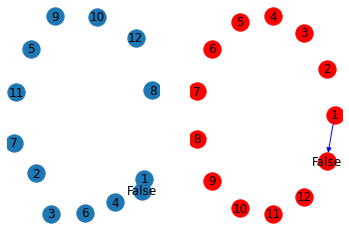

In [21]:
import matplotlib.pyplot as plt
subax1 = plt.subplot(121)
nx.draw(g,labels={n:n for n in g.nodes()})   # default spring_layout
subax2 = plt.subplot(122)
nx.draw(g, pos=nx.circular_layout(g), node_color='r', edge_color='b',labels={n:n for n in g.nodes()})

In [22]:
reverseGraph(G)

{2: (False, [1, 5]),
 3: (False, [2, 6]),
 4: (False, [2]),
 5: (False, [2, 4]),
 6: (False, [3, 5]),
 7: (False, [4, 5, 8, 9]),
 8: (False, [6, 7]),
 10: (False, [7, 12]),
 9: (False, [10]),
 11: (False, [10]),
 12: (False, [11]),
 1: (False, [1])}

In [23]:
scc = kosarajui_SSC_stack_initializePath(G)
scc

[12 11 10  7  9  8  6  3  4  2  5  1]


array([ 1,  4,  6,  4,  4,  6, 12, 12, 12, 12, 12, 12])

In [24]:
countedScc = Counter(scc)
largestComponents = np.sort(np.asarray(list(countedScc.values())))[::-1]
largestComponents

array([6, 3, 2, 1])

In [25]:
scc = kosarajui_SSC(G)
scc

NameError: name 'kosarajui_SSC' is not defined

In [26]:
countedScc = Counter(scc)
largestComponents = np.sort(np.asarray(list(countedScc.values())))[::-1]
largestComponents

array([6, 3, 2, 1])

# Final Solution to SCC

In [27]:
data = np.loadtxt('SCC.txt',dtype=int)
G = initializeDigraph(data)

In [28]:
t1 = time.time()
scc = kosarajui_SSC_stack_initializePath(G)
t2 = time.time()
t2-t1

KeyboardInterrupt: 

In [ ]:
countedScc = Counter(scc)
largestComponents = np.sort(np.asarray(list(countedScc.values())))[::-1][0:5]
largestComponents
